<a href="https://colab.research.google.com/github/ArcticFoox/problem_solving_programming/blob/main/problem_solving_mid_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🌻**문해프 중간고사 대비**🌻


**시험범위**: 강의 7 까지

**객관식 문제** 14문제(각각 1점씩)
예: 선형회귀 모델을 돌려서 결과의 계수를 나타내는 코드는 무엇인가? 등

**파이썬 코딩 3문제**(22점)
예: 미분방정식 파라미터, 초기값 등을 제시받고 시뮬레이션 하기, min max 최소값 함수 구하기, 선형회귀 구하기 등

아래의 4개 꼭 이해하고 응용해야함
#룽게 쿠타 방법
#미니마이즈
#피어슨 상관계수
#선형회귀학습

---------------------------------------

##🌼 **1주차**



In [ ]:
from google.colab import files
file = files.upload()

Saving case_2.xlsx to case_2 (5).xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
data = pd.read_excel(io.BytesIO(file['case_2.xlsx']))
# data=pd.read_excel(io.BytesIO(myfile['case_2 .xlsx']))

In [ ]:
#runge-kutta method test

def f(init_val, beta):
  S, E, I, R = init_val
  N = sum(init_val)
  dS = -beta*S/N*I + delta*R
  dE = beta*S/N*I - alpha*E
  dI = alpha*E - gamma*I
  dR = gamma*I - delta*R
  return np.array([dS, dE, dI, dR])

def rk4(f, init_val, stat_time, end_time, slice, beta):
  time = np.linspace(start_time, end_time, slice+1)
  x = np.array((slice+1)*[init_val])
  h = time[1] - time[0]
  for i in range(slice):
    k1 = f(x[i], beta)
    k2 = f(x[i] + k1*h/2, beta)
    k3 = f(x[i] + k2*h/2, beta)
    k4 = f(x[i] + k3*h, beta)
    x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)*h/6
  return time, x


start_time = 0
end_time = 1000
slice = 10000
init_val = np.array([51839994.0, 0.0, 6.0, 0.0]) # 비감염자, 잠복, 확진, 회복
alpha = 1/5 # 잠복기
beta = 0.4 # init_beta # 감염 상수
delta = 1/229 # 재감염률
gamma = 1/14 # 회복률

sol_time, sol_x = rk4(f, init_val, start_time, end_time, slice, beta)

plt.figure(figsize = (10,5))

x1 = sol_time
# S = sol_x[:,0]
# E = sol_x[:,1]
I = sol_x[:,2]
R = sol_x[:,3]

x2 = data.index[0:16]
y2 = data.loc[0:15, 'cases']
# plt.plot(x1,S, x1,E, x1,I, x1, R)
plt.plot(x1,I,'r', x1,R,'b', x2,y2,'*g')
plt.legend(('case_I','case_R', 'data'), fontsize = 10, loc = 'best')
plt.xlabel("TIME")
plt.ylabel("?")
plt.title("rk4_test")
plt.show()

NameError: ignored

In [ ]:
# 문제 해결 과정:
# 문제 및 목적 설정 > 데이터 전처리 및 분석 > 모델 설정, 변수 추정 > 성능 평가

---------------------------------------
## 🌼**2주차**
솔직히 2주차-3주차는 코로나 모델을 이렇게 저렇게 하며 이렇게 되나===\=csihcvjhhkasdkj

In [ ]:
# 데이터 분석을 위한 필수 패키지 삼대장
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**01 import numpy as np**

수치 데이터를 다루는 파이썬 패키지

벡터 및 행렬을 사용하는 선형 대수 계산에서 주로 사용

**02 import pandas as pd**

파이썬 데이터 처리를 위한 라이브러리

시리즈(Series),
데이터프레임(DataFrame),
패널(Panel)

**03 import matplotlib as plt**

데이터를 차트(chart)나 플롯(plot)으로 시각화하는 패키지

In [ ]:
#변수들을 정의하자
# ■ 시간 변수 정의

t0=0 #시작시간
tf=14 #끝시간
n=140 #격자 개수
h=(tf-t0)/n #격자 간격
time=np.linspace(t0,tf,n+1)
#시작점, 끝점, 점의 개수(간격수+1)의 3가지 변수로 벡터를 생성할 수 있다.

In [ ]:
# ■ 상태 변수 S, I, R 정의

#S : 감염될 수 있는 사람
#I : 감염된 사람 // 이 아래로 있는 I들 전부 l(소문자 엘)이 아니라 I(대문자 아이)임.
#R : 회복된 사람
initial_value=np.array([51839994.0,6.0,0.0])
#initial_value -> 객체의 성질
#np.array([51839994.0,6.0,0.0]) -> 행렬 생성
x=np.array((n+1)*[initial_value])
#(n+1)*[initial_value] -> 초기값(1*3행렬)을 n+1시간 개수만큼 행방향 생성
# = (n+1)*3행렬

In [ ]:
# ■ 나머지 변수 정의

N=51840000
beta=0.4
gamma=1/14

In [ ]:
# ■ 롱게-쿠타 방법

# 뭔 말인지 모르겠는데, 강의할 때 '이런 방법도 있다~ 하지만 복잡하다~'
# 식으로 넘어갔던 것으로 기억함.

#k1=[dS, dI, dR]
S=x[0,0]
I=x[0,1]
R=x[0,2]
dS=-beta*S*I/N
dI=beta*S*I/N-gamma*I
dR=gamma*I
k1=np.array([dS,dI,dR])

S=x[0,0]+k1[0]*h/2
I=x[0,1]+k1[1]*h/2
R=x[0,2]+k1[2]*h/2
dS=-beta*S*I/N
dI=beta*S*I/N-gamma*I
dR=gamma*I
k2=np.array([dS,dI,dR])

S=x[0,0]+k2[0]*h/2
I=x[0,1]+k2[1]*h/2
R=x[0,2]+k2[2]*h/2
dS=-beta*S*I/N
dI=beta*S*I/N-gamma*I
dR=gamma*I
k3=np.array([dS,dI,dR])

S=x[0,0]+k3[0]*h
I=x[0,1]+k3[1]*h
R=x[0,2]+k3[2]*h
dS=-beta*S*I/N
dI=beta*S*I/N-gamma*I
dR=gamma*I
k4=np.array([dS,dI,dR])

x[1]=x[0]+h*(k1+2*k2+2*k3+k4)/6

x[1]

array([5.18399938e+07, 6.20041737e+00, 4.35689991e-02])

In [ ]:
# ■ 반복문

for i in range(n):
  #i : 반복하는 문자
  #range(): 연속된 숫자(정수)를 만들어 줌.
  #ㄴrange(시작숫자, 마지막 숫자(포함안함), 간격)
  #ㄴ숫자 하나면 마지막 숫자임 (0부터 1 간격)

  S=x[i,0]
  I=x[i,1]
  R=x[i,2]
  dS=-beta*S*I/N
  dI=beta*S*I/N-gamma*I
  dR=gamma*I
  k1=np.array([dS,dI,dR])

  S=x[i,0]+k1[0]*h/2
  I=x[i,1]+k1[1]*h/2
  R=x[i,2]+k1[2]*h/2
  dS=-beta*S*I/N
  dI=beta*S*I/N-gamma*I
  dR=gamma*I
  k2=np.array([dS,dI,dR])

  S=x[i,0]+k2[0]*h/2
  I=x[i,1]+k2[1]*h/2
  R=x[i,2]+k2[2]*h/2
  dS=-beta*S*I/N
  dI=beta*S*I/N-gamma*I
  dR=gamma*I
  k3=np.array([dS,dI,dR])

  S=x[i,0]+k3[0]*h
  I=x[i,1]+k3[1]*h
  R=x[i,2]+k3[2]*h
  dS=-beta*S*I/N
  dI=beta*S*I/N-gamma*I
  dR=gamma*I
  k4=np.array([dS,dI,dR])

  x[i+1]=x[i]+h*(k1+2*k2+2*k3+k4)/6

In [ ]:
x

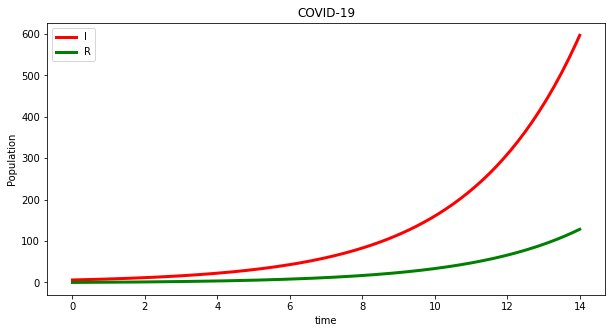

In [ ]:
# ■ Matplotlib 이용한 그림 그리기
plt.figure(figsize=(10,5)) # 그림 크기 설정
t=time
I_t=x[:,1] #I : 감염 시간
R_t=x[:,2] #R : 회복 시간
lines = plt.plot(t,I_t,'r',t,R_t,'g')
plt.setp(lines[0], linewidth=3) # 그림 셋업
plt.setp(lines[1], linewidth=3)
plt.xlabel('time') # x 라벨
plt.ylabel('Population') # y 라벨
plt.legend(('I','R'),fontsize=10,loc='best') # 범례
plt.title('COVID-19') # 제목
plt.show()

In [ ]:
# ■ 실제 신규 감염자 데이터와 비교

# 신규확진자
S_t=x[:,0]
Simulation_NI=beta*S_t*I_t/N

In [ ]:
# 파일 입출력

# 파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

Saving case_2.xlsx to case_2 (6).xlsx


In [ ]:
# 파일 입출력 기능
import io

In [ ]:
# pd.read_excel로 xlsx파일 불러오기
data=pd.read_excel(io.BytesIO(myfile['case_2.xlsx']))

In [ ]:
data

In [ ]:
data.loc[0:14,'cases'] # .loc로 행,렬 조회하기

0       6
1       6
2      15
3      14
4      22
5      19
6      34
7      17
8      17
9      29
10     45
11     55
12    142
13    272
14    178
Name: cases, dtype: int64

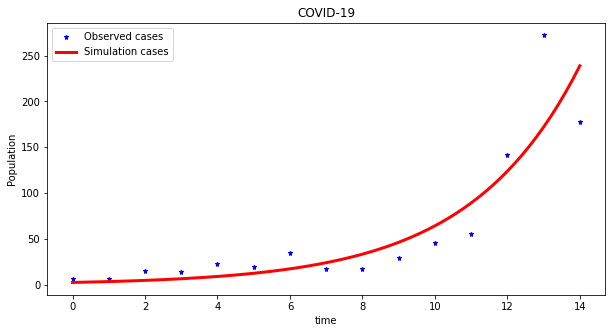

In [ ]:
# 실제 신규 감염자 데이터와 비교 - Matplotlib 이용한 그림 그리기

plt.figure(figsize=(10,5)) # 그림 크기 설정
t1=data.index[0:15]
t2=time
y1=data.loc[0:14,'cases']
y2=Simulation_NI
lines = plt.plot(t1,y1,'*b',t2,y2,'r')
plt.setp(lines[0], markersize=5) # 점 그림 셋업
plt.setp(lines[1], linewidth=3) # 선 그림 셋업
plt.xlabel('time') # x 라벨
plt.ylabel('Population') # y 라벨
plt.legend(('Observed cases','Simulation cases'),fontsize=10,loc='best') # 범례
# upper right
plt.title('COVID-19') # 제목
plt.show()

**■ 함수 제작하기**

def 축약할 이름():

 축약할긴코드들 a

 축약할긴코드들 b

In [ ]:
def rk4(f, initial_value, t0, tf, n):
  time = np.linspace(t0,tf,n+1) # x grid
  x = np.array((n+1)*[initial_value]) # 각 x에 대한 시스템 상태 배열
  h = time[1] - time[0] # 크기
  for i in range(n): # 4차 롱게-쿠타 방법
    k0 = f(x[i])
    k1 = f(x[i]+k0*h/2)
    k2 = f(x[i]+k1*h/2)
    k3 = f(x[i]+k2*h)
    x[i+1]=x[i]+h*(k0+2*k1+2*k2+k3)/6
  return time, x

In [ ]:
def f(u):
  S,I,R = u
  N = sum(u)
  dS = -beta*S*I/N
  dI = beta*S*I/N - gamma*I
  dR = gamma*I
  return np.array([dS,dI,dR])

#S : 감염될 수 있는 사람
#I : 감염된 사람 // 이 아래로 있는 I들 전부 l(소문자 엘)이 아니라 I(대문자 아이)임.
#R : 회복된 사람

In [ ]:
N_time, N_x = rk4(f, initial_value, t0, tf, n)

In [ ]:
plt.figure(figsize=(10,5))
t = time
I_t = x[:,1]
R_t = x[:,2]
lines = plt.plot(t, I_t, 'r',t, R_t,'g')
plt.setp(lines[0], linewidth=3)
plt.setp(lines[1], linewidth=3)
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('I', 'R'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

In [ ]:
# 신규 확진자
S_t=N_x[:,0]
Simulation_NI2=beta+S_t*I_t/N

In [ ]:
plt.figure(figsize=(10,5))
t1 = data.index[0:15]
t2 = time
y1 = data.loc[0:14,'cases']
y2 = Simulation_NI2
lines = plt.plot(t1, y1, '*b',t2, y2,'r')
plt.setp(lines[0], markersize=5)
plt.setp(lines[1], linewidth=3)
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('observed case', 'Simulation cases'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

---------------------------------------
## 🌼**3주차**
2주차보다 더 실험적이고 응용적인 코로나 관련 내용이 있어서 이해만 하면 되지 않을까 싶어

In [ ]:
# ■ 고정점과 안정성 검사 시뮬레이션 테스트

def f(u):
  S,I,R = u
  dS = -beta*S*I/N+delta*R
  dI = beta*S*I/N - gamma*I
  dR = gamma*I-delta*R
  return np.array([dS,dI,dR])

**기초 감염 재생산수 (R0)**

최초 감염자가 감염기간 동안에 감염시킬 수 있는 2차 감염자의 수

R0 = 감염확률 x 접촉빈도 x 전파기간


In [ ]:
#변수들을 정의하자
# ■ 시간 변수 정의
t0=0 # 시작시간
tf=1000 # 끝시간 <- 최대한 길게
n=10000 # 격자 개수
h=(tf-t0)/n # 격자 간격
N=51840000
beta=0.4 # 감염상수
gamma=1/14 # 회복률
delta=1/229 # 1/재감염 평균일수

In [ ]:
# 이때, 기초 감염 재생산수는?
R0=beta/gamma
R0

5.6000000000000005

In [ ]:
time, x = rk4(f, initial_value, t0, tf, n)



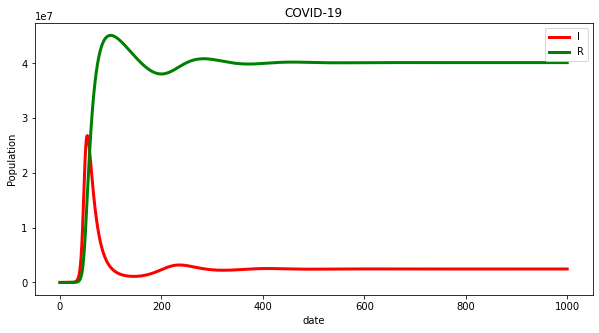

In [ ]:
# ■ I와 R을 그려보자. 어디로 가는가?

plt.figure(figsize=(10,5))
t = time
I_t = x[:,1]
R_t = x[:,2]
lines = plt.plot(t, I_t, 'r',t, R_t,'g')
plt.setp(lines[0], linewidth=3)
plt.setp(lines[1], linewidth=3)
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('I', 'R'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

In [ ]:
# 수치로 확인해보자. 정말 E2 로 가는가?
E2=np.array([gamma*N/beta, (1-gamma/beta)*N/(1+gamma/delta),gamma*(1-gamma/beta)*N/(delta+gamma)])

In [ ]:
E2

array([ 9257142.85714286,  2453333.33333333, 40129523.80952381])

In [ ]:
x
# 안 가지용

In [ ]:
# 이번에는 R0(감염상수) 를 1 보다 살짝 높게 beta 를 1/13 로 입력하여 시뮬레이션 해보자.
# 마찬가지로 E2 으로 가까이 가는가?
t0=0 # 시작시간
tf=1000 # 끝시간 <- 최대한 길게
n=10000 # 격자 개수
h=(tf-t0)/n # 격자 간격
N=51840000
beta=0.4 # 감염상수
gamma=1/14 # 회복률
delta=1/229 # 1/재감염 평균일수

beta=1/13
time, x = rk4(f, initial_value, t0, tf, n)
E2=np.array([gamma*N/beta, (1-gamma/beta)*N/(1+gamma/delta),gamma*(1-gamma/beta)*N/(delta+gamma)])
print(E2)

[48137142.85714285   213333.33333333  3489523.80952381]


In [ ]:
x # 왜 beta값을 바꿔도 위랑 똑같음????????? #책갈피

array([[5.18399940e+07, 6.00000000e+00, 0.00000000e+00],
       [5.18399938e+07, 6.20041737e+00, 4.35595397e-02],
       [5.18399935e+07, 6.40752925e+00, 8.85550766e-02],
       ...,
       [9.25702008e+06, 2.45328527e+06, 4.01296946e+07],
       [9.25702074e+06, 2.45328504e+06, 4.01296942e+07],
       [9.25702139e+06, 2.45328481e+06, 4.01296938e+07]])

In [ ]:
# 이번에는 R0(감염상수) 를 1 보다 살짝 낮게 beta 를 1/15 로 입력하여 시뮬레이션 해보자.
# 마찬가지로 E1 으로 가까이 가는가?
beta=1/15

In [ ]:
x

array([[5.18399940e+07, 6.00000000e+00, 0.00000000e+00],
       [5.18399938e+07, 6.20041737e+00, 4.35595397e-02],
       [5.18399935e+07, 6.40752925e+00, 8.85550766e-02],
       ...,
       [9.25702008e+06, 2.45328527e+06, 4.01296946e+07],
       [9.25702074e+06, 2.45328504e+06, 4.01296942e+07],
       [9.25702139e+06, 2.45328481e+06, 4.01296938e+07]])

결론 : beta값을 구해야 한다!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#변수들을 정의하자
# 시간변수
t0=0 # 시작시간
tf=15 # 끝시간 <- 이거 바꿈
n=150 # 격자 개수 <- 이거 바꿈
h=(tf-t0)/n # 격자 간격
N=51840000
alpha=1/5 #잠복기 <- 이거 추가함
gamma=1/14 # 회복률
delta=1/229 # 1/재감염 평균일수

In [ ]:
# beta값을 포함한 함수 제작
# 잠복기가 추가된 모델 SEIR

def fit_F(u, beta):
  S,E,I,R = u
  N=sum(u)
  dS = -beta*S*I/N+delta*R
  dE = beta*S*I/N-alpha*E
  dI = alpha*E-gamma*I
  dR = gamma*I-delta*R
  return np.array([dS,dE,dI,dR])

In [ ]:
def rk4(fit_F, initial_value, t0, tf, n, beta):
  time = np.linspace(t0,tf,n+1) # x grid
  x = np.array((n+1)*[initial_value]) # 각 x에 대한 시스템 상태 배열
  h = time[1] - time[0] # 크기
  for i in range(n): # 4차 롱게-쿠타 방법
    k0 = fit_F(x[i], beta)
    k1 = fit_F(x[i]+0.5*k0, beta)
    k2 = fit_F(x[i]+0.5*k1, beta)
    k3 = fit_F(x[i]+k2*h, beta)
    x[i+1]=x[i]+h*(k0+2*(k1+k2)+k3)/6
  return time, x

In [ ]:
# E값을 포함한 초기값으로
initial_value=np.array([51839994.0, 0.0, 6.0, 0.0])

In [ ]:
time, x = rk4(fit_F, initial_value, t0, tf, n, 1)
#beta값을 설정함으로서 결과 도출

In [ ]:
# 파일 입출력

# 파일 직접 업로드하기
from google.colab import files
myfile = files.upload()
import io
# pd.read_excel로 xlsx파일 불러오기
data=pd.read_excel(io.BytesIO(myfile['case_2.xlsx']))
data.head()

Saving case_2.xlsx to case_2 (1).xlsx


,date,cases
0,2020-08-01,6
1,2020-08-02,6
2,2020-08-03,15
3,2020-08-04,14
4,2020-08-05,22


In [ ]:
# 시간을 0-15 시간으로 설정했기 때문에 동일하게 감염자 데이터도 15 까지 가져오자.
data_y = data.loc[0:15,'cases']

In [ ]:
# 신규확진자
Simulation_NI=alpha*x[:,1]
Simulation_NI

array([0.00000000e+00, 1.11392841e-01, 2.21328661e-01, 3.30017693e-01,
       4.37664918e-01, 5.44470500e-01, 6.50630192e-01, 7.56335746e-01,
       8.61775295e-01, 9.67133732e-01, 1.07259308e+00, 1.17833283e+00,
       1.28453031e+00, 1.39136100e+00, 1.49899889e+00, 1.60761676e+00,
       1.71738652e+00, 1.82847951e+00, 1.94106682e+00, 2.05531957e+00,
       2.17140918e+00, 2.28950773e+00, 2.40978816e+00, 2.53242463e+00,
       2.65759274e+00, 2.78546985e+00, 2.91623535e+00, 3.05007091e+00,
       3.18716080e+00, 3.32769215e+00, 3.47185523e+00, 3.61984370e+00,
       3.77185495e+00, 3.92809034e+00, 4.08875550e+00, 4.25406064e+00,
       4.42422078e+00, 4.59945613e+00, 4.77999234e+00, 4.96606081e+00,
       5.15789902e+00, 5.35575083e+00, 5.55986683e+00, 5.77050463e+00,
       5.98792923e+00, 6.21241337e+00, 6.44423786e+00, 6.68369193e+00,
       6.93107367e+00, 7.18669032e+00, 7.45085874e+00, 7.72390576e+00,
       8.00616862e+00, 8.29799539e+00, 8.59974538e+00, 8.91178964e+00,
      

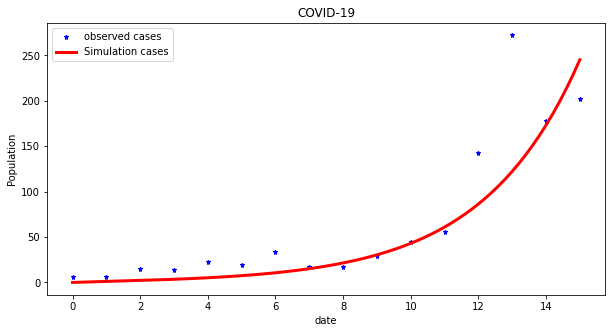

In [ ]:
#그림을 그려 비교해보자
plt.figure(figsize=(10,5))
t1 = data.index[0:16]
t2 = time
y1 = data_y
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b',t2, y2,'r')
plt.setp(lines[0], markersize=5)
plt.setp(lines[1], linewidth=3)
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('observed cases', 'Simulation cases'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

In [ ]:
# 어떻게 제곱오차가 최소가 되게 할 수 있을까?
# 먼저 시뮬레이션 결과를 데이터와 동일한 형태로

Simulation_NI[0:151:10]

array([  0.        ,   1.07259308,   2.17140918,   3.47185523,
         5.15789902,   7.45085874,  10.64029094,  15.12171894,
        21.44640119,  30.38958043,  43.04577232,  60.96287098,
        86.33153819, 122.25306184, 173.11842727, 245.14489707])

In [ ]:
# 파이썬에서는 같은 형태의 벡터끼리의 합과 뺄셈은
# 성분간의 합과 뺄셈으로 계산된다.

diff=data_y-Simulation_NI[0:151:10]
MSE=np.dot(diff,diff)/len(diff) #np.dot은 파이썬에서 내적을 의미한다.

In [ ]:
# MSE를 계산하는 과정을 함수화
def diff_F(data_y, initial_value, t0, tf, n, x2):
  time, SIR_t = rk4(fit_F, initial_value, t0, tf, n, x2)
  Simulation_NI=alpha*SIR_t[:,1]
  diff=data_y-Simulation_NI[0:n+1:int(1/h)]
  MSE=np.dot(diff,diff)/len(diff)
  return MSE

In [ ]:
# 함수 계산과 기존 계산 일치 -> 일치하다!
# MSE = 평균제곱오차

MSE=np.dot(diff,diff)/len(diff)
MSE

1798.2155104096296

In [ ]:
diff_F(data_y, initial_value, t0, tf, n, 1)

1798.2155104096296

In [ ]:
# 최적의 beta 값 찾기
# 이전결과와 새로운 결과를 비교하여 오차 줄이기

error_val=10
val=0.1
DPL=0

In [ ]:
old_beta=0.1
old_result=diff_F(data_y, initial_value, t0, tf, n, old_beta)
New_beta=old_beta+(-1)**(DPL)*val
New_result=diff_F(data_y, initial_value, t0, tf, n, New_beta)
while error_val>0.001: #허용오차
  if New_result<old_result: #허용오차
    old_beta=New_beta
    old_result=New_result
    New_beta=old_beta+(-1)**(DPL)*val
    New_result=diff_F(data_y, initial_value, t0, tf, n, New_beta)
  else:
    old_beta=New_beta
    old_result=New_result
    val=val/2
    DPL=DPL+1
    New_beta=old_beta+(-1)**(DPL)*val
    New_result=diff_F(data_y, initial_value, t0, tf, n, New_beta)
  error_val=abs(New_result-old_result)

In [ ]:
# 이전 beta=1 보다 작은 MSE
New_beta

1.0200195312499993

In [ ]:
New_result

1738.3069731747676

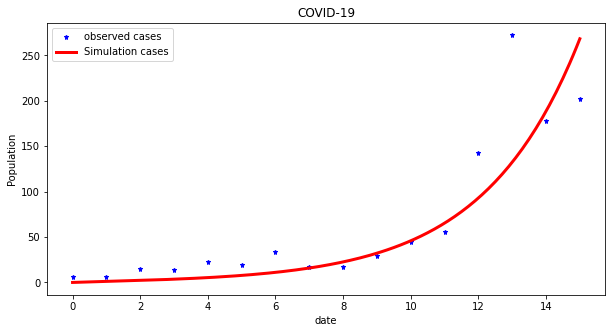

In [ ]:
# 최적의 beta를 구했으니 다시 그려보자!

time, x = rk4(fit_F, initial_value, t0, tf, n, New_beta)

# 신규 확진자
Simulation_NI=alpha*x[:,1]

plt.figure(figsize=(10,5))
t1 = data.index[0:16]
t2 = time
y1 = data_y
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b',t2, y2,'r')
plt.setp(lines[0], markersize=5)
plt.setp(lines[1], linewidth=3)
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('observed cases', 'Simulation cases'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

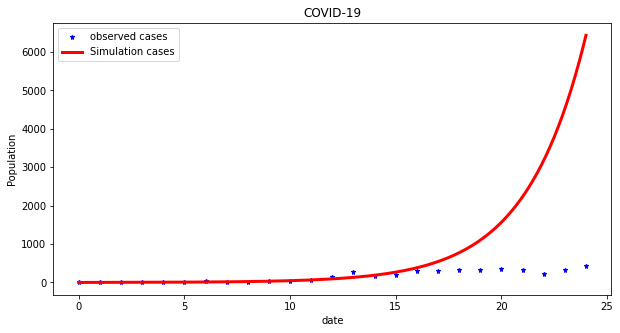

In [ ]:
# 그 이상에 시간에서도 잘 맞을까?
t0=0
tf=24
n=240
h=(tf-t0)/n
N=51840000
alpha=1/5
gamma=1/14 #회복률
delta=1/229

time, x = rk4(fit_F, initial_value, t0, tf, n, New_beta)
Simulation_NI=alpha*x[:,1]

plt.figure(figsize=(10,5))
t1 = data.index
t2 = time
y1 = data['cases']
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b',t2, y2,'r')
plt.setp(lines[0], markersize=5)
plt.setp(lines[1], linewidth=3)
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('observed cases', 'Simulation cases'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

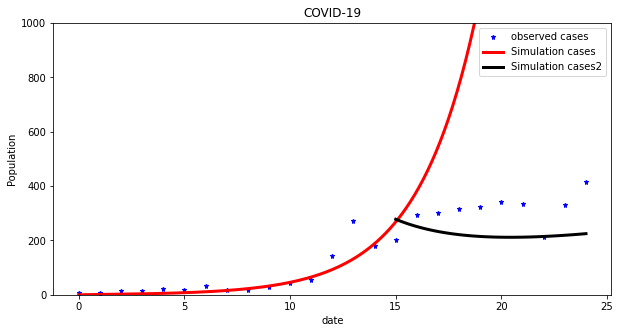

In [ ]:
# 왜 맞지 않을까? 거리두기 2단계로 바뀌어 변수가 생겼기 때문.
# 8월 16 일 결과를 초기값으로 beta 를 낮춰보자

initial_value2=x[151,:]

t02=15 #시작시간
tf2=24 #끝시간
n2=90 #격자개수

New_beta2=0.14

N_time, N_x =rk4(fit_F, initial_value2, t02, tf2, n2, New_beta2)

# 신규 확진자
Simulation_NI=alpha*x[:,1]

plt.figure(figsize=(10,5))
t1 = data.index
t2 = time
t3 = N_time
y1 = data['cases']
y2 = Simulation_NI
y3 = alpha*N_x[:,1]
lines = plt.plot(t1, y1, '*b',t2, y2,'r', t3, y3, 'k')
plt.setp(lines[0], markersize=5)
plt.setp(lines[1], linewidth=3)
plt.setp(lines[2], linewidth=3)
plt.ylim([0,1000])
plt.xlabel('date')
plt.ylabel('Population')
plt.legend(('observed cases', 'Simulation cases', 'Simulation cases2'), fontsize=10,loc='best')#'upper right')
plt.title('COVID-19')
plt.show()

---------------------------------------
## 🌼**4주차**
최적화문제, minimize

In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# minimize 라이브러리
from scipy.optimize import minimize


**minimize 함수 사용 방법**

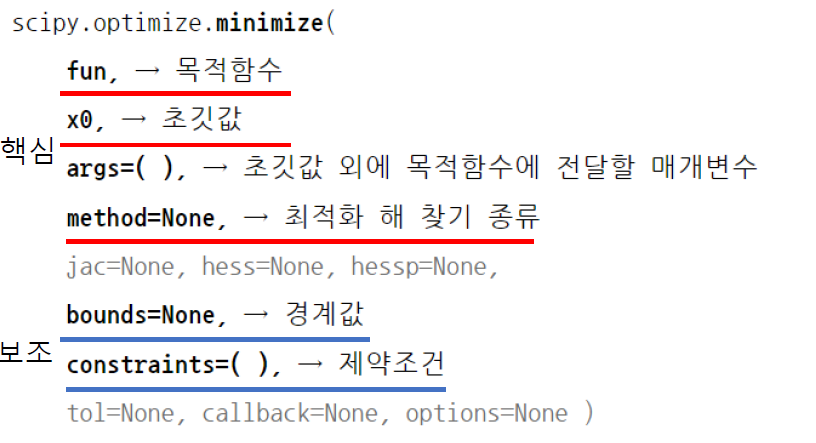

In [ ]:
# 문제: 목적함수가 다음과 같은 4차 함수의 최소값을 구하여라.
# [ x**4 - 4*x**3 + 4*x**2 + x - 4 ]

#목적함수: obj_fun
def obj_fun(x):
  return x**4-4*x**3+4*x**2+x-4

#초기값 (임의의 x에 가까운 값 or 조건에 위배되지 않는 값으로 정의)
x0=0.5

sol=minimize(obj_fun, x0, method='SLSQP') #SLSQP=최적화 해 찾기 종류

#종합결과
sol

     fun: array([-4.05617284])
     jac: array([0.00093824])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-0.10707227])

    x: 최적화 해
    success: 최적화에 성공하면 True 반환
    status: 종료 상태. 최적화에 성공하면 0 반환
    message: 메시지 문자열
    fun: X 위치에서의 함수의 값
    jac: X 위치에서의 자코비안(그레디언트) 벡터의 값
    hess_inv: X 위치에서의 헤시안 행렬의 역행렬의 값
    nfev: 목적함수 호출 횟수
    njev: 자코비안 계산 횟수
    nhev: 헤시안 계산 횟수
    nit: X 이동 횟수


In [ ]:
# .변수로 원하는 결과만 호출
sol.x

array([-0.10707227])

In [ ]:
sol.fun

array([-4.05617284])

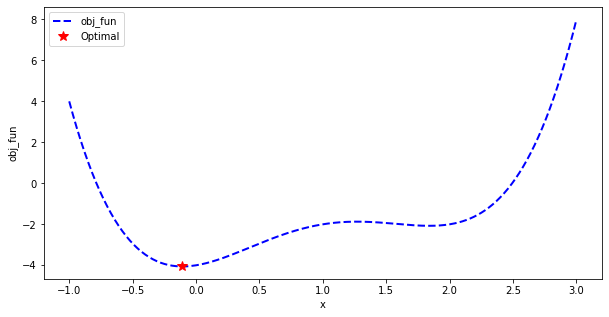

In [ ]:
# 진짜로 최소값이 나왔는지 그림으로 확인해보자

plt.figure(figsize=(10,5))
x1=np.linspace(-1,3,401)  # 예제 그림처럼 -1~3까지 그리기 위해 x격자 설정
x2=sol.x # 최소값 결과는 점을 찍을 것이므로 결과에 해당하는 sol.x를 x값으로 설정
y1=obj_fun(x1) # 목적함수의 그림을 그리기 위해 목적함수에 -1~3 격자 입력
y2=sol.fun # 최소값의 결과인 fun 변수 호출
lines = plt.plot(x1,y1,'--b',x2,y2,'*r')
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], markersize=10)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal'), fontsize=10,loc='best')
plt.show()

In [ ]:
#만약에 x에 범위가 존재한다면?
bound=(0,3) #소괄호에 주목.

Minimize
함수에서 범위는 **튜플형** 으로 값을 입력해야한다.

    튜플(tuple)은 몇 가지 점을 제외하곤 리스트와 거의 비슷하며 리스트와 다른 점은 다음과 같다.
    1. 리스트는 [ ]로 둘러싸지만 튜플은 ( )으로 둘러싼다.
    2. 리스트는 그 값의 생성, 삭제, 수정이 가능하지만 튜플은 그 값을 바꿀 수 없다.

튜플의 모습은 다음과 같다.

      >>> t1 = ()
      >>> t2 = (1, )
      >>> t3 = (1, 2, 3)
      >>> t4 = 1, 2, 3
      >>> t5 = ('a', 'b', ('ab', 'cd')
리스트와 모습은 거의 비슷하지만 튜플에서는 리스트와 다른 2가지 차이점을 찾아볼 수 있다. t2=(1,)처럼 단지 1개의 요소만을 가질 때는 요소 뒤에 콤마(,)를 반드시 붙여야 한다는 것과 t4=1,2,3처럼 괄호()를 생략해도 무방하다는 점이다.

In [ ]:
sol_2=minimize(obj_fun, x0, method='SLSQP', bounds=(bound,))
# bound, -> 범위가 하나지만 쉼표를 붙이고 괄호를 닫는다.

In [ ]:
sol_2 # 기존의 최소값을 만드는 x 가 0 으로 변했다.

     fun: array([-4.])
     jac: array([1.00000006])
 message: 'Optimization terminated successfully'
    nfev: 4
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.])

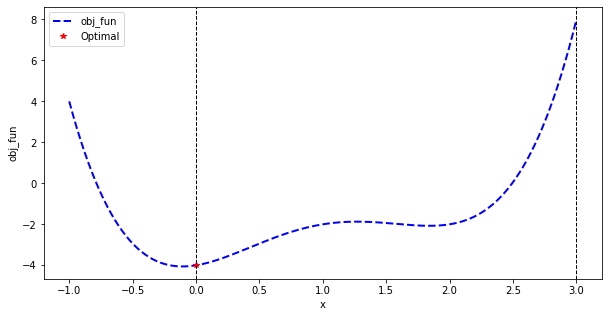

In [ ]:
# 진짜로 최소값이 나왔는지 그림으로 확인해보자.

plt.figure(figsize=(10,5))
x1=np.linspace(-1,3,401)
x2=sol_2.x
y1=obj_fun(x1)
y2=sol_2.fun
lines = plt.plot(x1,y1,'--b',x2,y2,'*r')
plt.setp(lines[0], linewidth=2)
plt.setp(lines[0], markersize=10)
plt.axvline(x=bound[0], color='k', linestyle='--', linewidth=1)
# 그래프에 수직선 axvline 추가
# * 수평선은 axhline
plt.axvline(x=bound[1], color='k', linestyle='--', linewidth=1)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal'), fontsize=10,loc='best')
plt.show()


In [ ]:
# ■ 제약조건 추가
# 목적함수가 2x5 라는 직선과 만나는 점들 중에
# 최소가 되게하는 x 를 찾아보자.
# 그럼 만나는 점이므로 (2x-5)-목적함수=0이다.

# (2x-5)-목적함수=0 정의
def constraint(x):
  return (2*x-5)-obj_fun(x)

# =0인 등식함수는 'eq'를 사용하고 부등식은 'ineq를 사용한다.
con={'type':'eq','fun':constraint}

sol_3=minimize(obj_fun, x0, method='SLSQP', bounds=(bound,), constraints=con)

sol_3

     fun: array([-1.9502228])
     jac: array([-0.52111018])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.5248886])

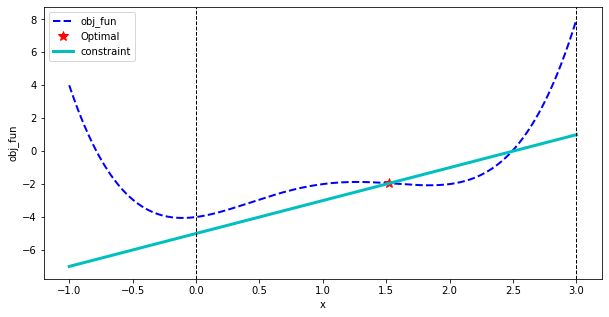

In [ ]:
# 제약조건이 적용되었는지 그림으로 확인해보자.

plt.figure(figsize=(10,5))
x1=np.linspace(-1,3,401)
x2=sol_3.x
y1=obj_fun(x1)
y2=sol_3.fun
y3= (2*x1-5) # 제약조건의 직석 2x-5를 그려보자.
lines = plt.plot(x1,y1,'--b', x2,y2,'*r', x1,y3,'c')
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], markersize=10)
plt.setp(lines[2], linewidth=3)
plt.axvline(x=bound[0], color='k', linestyle='--', linewidth=1)
plt.axvline(x=bound[1], color='k', linestyle='--', linewidth=1)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal', 'constraint'), fontsize=10,loc='best')
plt.show()

In [ ]:
# 우리가 원하는 최소화 점을 찾지 못할 수도 있다.
# 예를 들어, x0=1.5일때
x0=1.5
sol=minimize(obj_fun,x0,method='SLSQP')
sol
#실행시키면 결과가 다르다.

     fun: array([-2.07334168])
     jac: array([0.00093734])
 message: 'Optimization terminated successfully'
    nfev: 11
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.83777745])

In [ ]:
# ■ minimize와 basinhopping 의 비교
from scipy.optimize import basinhopping
x0=1.5
test_1 = sol=minimize(obj_fun,x0,method='SLSQP')
test_2=basinhopping(obj_fun,x0)

#목적함수: obj_fun
def obj_fun(x):
  return x**4-4*x**3+4*x**2+x-4

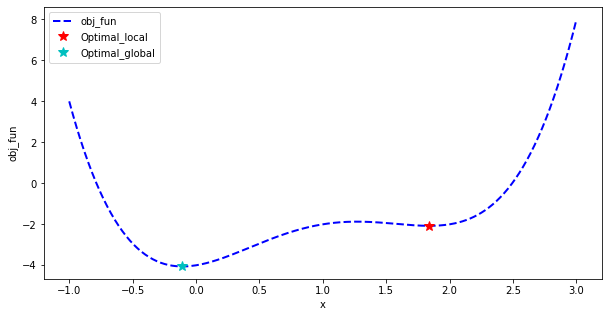

In [ ]:
plt.figure(figsize=(10,5))
x1=np.linspace(-1,3,401)
x2=test_1.x #결과 비교를 위해
x3=test_2.x # 두 최소화값 점찍기.
y1=obj_fun(x1)
y2=test_1.fun # test_1은 minimize
y3=test_2.fun # test_2는 basinhopping
lines = plt.plot(x1,y1,'--b', x2,y2,'*r', x3,y3,'*c')
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], markersize=10)
plt.setp(lines[2], markersize=10)
plt.xlabel('x')
plt.ylabel('obj_fun')
plt.legend(('obj_fun', 'Optimal_local','Optimal_global'), fontsize=10,loc='best')
plt.show()

In [ ]:
# ■ 최적화를 이용한 beta 추정 시뮬레이션
# 라이브러리부터 변수까지 동일하게 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import basinhopping

t0=0
tf=15
n=150
h=(tf-t0)/n
N=51840000
alpha=1/5 #잠복기
gamma=1/14 #회복률
delta=1/229
time=np.linspace(t0,tf,n+1)

initial_value=np.array([51839994.0, 0.0, 6.0, 0.0])

In [ ]:
# ■ 방정식과 룬제쿤타 방법을 함수화
# 룬제쿤타 방법이 뭐냐? 적분 방정식 중 초기값 문제를 푸는 방법
# 적분이 뭐냐? 초기값은 뭐냐? 예체능 살려

# 이해못했으니 생략..


---------------------------------------
## 🌼**5주차**

첫번째 코드 파일

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import basinhopping

In [ ]:
# 변수 정의
# 시간
t0=0 # 시작시간
tf=15 # 끝시간
n=150 # 격자 개수
h=(tf-t0)/n # 격자 간격
N=51840000
alpha=1/5 # 잠복기
gamma=1/14 # 회복률
delta=1/229
time=np.linspace(t0,tf,n+1)

In [ ]:
initial_value=np.array([51839994.0, 0.0, 6.0, 0.0])

In [ ]:
# 변수가 하나가 아니라면?
# 함수에서 변수를 다변수로 지정하면 된다. params[0], params[1] 처럼
def f(u, params):
  S,E,I,R = u
  res = np.zeros(4)
  res[0] = -params[0]*S*I/N+delta*R
  res[1] = params[0]*S*I/N-alpha*E
  res[2] = alpha*E-params[1]*I
  res[3] = params[1]*I-delta*R
  return res

In [ ]:
def rk4(f, initial_value, t0, tf, n, params):
  time = np.linspace(t0,tf,n+1)
  x = np.array((n+1)*[initial_value])
  h = time[1] - time[0]
  for i in range(n):
    k1 = f(x[i], params)
    k2 = f(x[i]+k1*h/2, params)
    k3 = f(x[i]+k2*h/2, params)
    k4 = f(x[i]+k3*h, params)
    x[i+1]=x[i]+h*(k1+2*k2+2*k3+k4)/6
  return x

In [ ]:
def sse(f,N0,data_record,t0,tf,n):
  def result(x):
    Nt=rk4(f, initial_value, t0, tf, n, x)
    SIN=alpha*Nt[:,1]
    diff=data_record-SIN[0:n+1:int(n/(tf-t0))]
    MSE=np.dot(diff,diff)/len(diff)
    return MSE
  return result

In [ ]:
#파일 직접 업로드하기
from google.colab import files
myfile = files.upload()
import io
#pd.read_excel로 xlsx파일 불러오기
data = pd.read_excel(io.BytesIO(myfile['Cases(COVID-19)_test1.xlsx']))
data.head()

Saving Cases(COVID-19)_test1.xlsx to Cases(COVID-19)_test1.xlsx


,date,cases
0,2020-08-01,6
1,2020-08-02,6
2,2020-08-03,15
3,2020-08-04,14
4,2020-08-05,22


In [ ]:
data_y=data.loc[0:15,'cases']

In [ ]:
bound1=(0,100)
bound2=(0,1)
params_init=[0.75,1/14]
params=minimize(sse(f,initial_value,data_y,t0,tf,n),params_init,method='SLSQP',bounds=(bound1,bound2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in add
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
params

     fun: 1543.9476727935407
     jac: array([-2.21252441e-03, -6.50776062e+01])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 15
    njev: 14
  status: 0
 success: True
       x: array([3.41163495, 1.        ])

두 번째 SD 관련 코드 파일

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import basinhopping

In [ ]:
# 변수 정의
# 시간
t0=0 # 시작시간
tf=15 # 끝시간
n=150 # 격자 개수
h=(tf-t0)/n # 격자 간격
N=51840000
alpha=1/5 # 잠복기
gamma=1/14 # 회복률
delta=1/229
time=np.linspace(t0,tf,n+1)

In [ ]:
initial_value=np.array([51839994.0, 0.0, 6.0, 0.0]) # 전체 인구, 잠복기, 감염자, 회복자

In [ ]:
def f(u, beta):
  S,E,I,R = u
  res = np.zeros(4)
  res[0] = -beta*S*I/N + delta*R
  res[1] = beta*S*I/N - alpha*E
  res[2] = alpha*E - gamma*I
  res[3] = gamma*I-delta*R
  return res

In [ ]:
def rk4(f, initial_value, t0, tf, n, beta):
  time = np.linspace(t0,tf,n+1)
  x = np.array((n+1)*[initial_value])
  h = time[1] - time[0]
  for i in range(n):
    k1 = f(x[i], beta)
    k2 = f(x[i]+k1*h/2, beta)
    k3 = f(x[i]+k2*h/2, beta)
    k4 = f(x[i]+k3*h, beta)
    x[i+1]=x[i]+h*(k1+2*k2+2*k3+k4)/6
  return x

In [ ]:
def sse(f,N0,data_record,t0,tf,n):
  def result(x):
    Nt=rk4(f, initial_value, t0, tf, n, x)
    SIN=alpha*Nt[:,1]
    diff=data_record-SIN[0:n+1:int(n/(tf-t0))]
    MSE=np.dot(diff,diff)/len(diff)
    return MSE
  return result

In [ ]:
#파일 직접 업로드하기
from google.colab import files
myfile = files.upload()
import io
#pd.read_excel로 xlsx파일 불러오기
data = pd.read_excel(io.BytesIO(myfile['Cases(COVID-19)_test2.xlsx']))
data.head()

Saving Cases(COVID-19)_test2.xlsx to Cases(COVID-19)_test2 (2).xlsx


,date,cases
0,2020-08-01,6
1,2020-08-02,6
2,2020-08-03,15
3,2020-08-04,14
4,2020-08-05,22


In [ ]:
bound=(0,100)
param_int=0.75
data_record=data.loc[0:15,'cases']
param=minimize(sse(f,initial_value,data_record,t0,tf,n), param_int, method='SLSQP', bounds=(bound,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in add
  import sys


In [ ]:
param

     fun: 1711.9632401882993
     jac: array([-0.01554871])
 message: 'Optimization terminated successfully'
    nfev: 29
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.15347355])

In [ ]:
N_x1 = rk4(f, initial_value, t0, tf, n, param.x)

In [ ]:
SNI_1=alpha*N_x1[:,1]

In [ ]:
# 2주간 예측을 위해 새로운 시간과 추정한 beta, 8월 16일의 초기값을 정의한다.

# 2주간 예측
beta = param.x
t02=15
tf2=29
n2=140
initial_value2=N_x1[150]
time_2=np.linspace(t02,tf2,n2+1)

In [ ]:
import math

In [ ]:
def beta_SD(SD): # beta 감소율 함수 정의
  return math.sin(math.pi*(SD-1)/4)

In [ ]:
def SD_f(u, SD):
  S,E,I,R = u
  res = np.zeros(4)
  res[0] = -beta*(1-beta_SD(SD))*S*I/N+delta*R
  res[1] = beta*(1-beta_SD(SD))*S*I/N-alpha*E
  res[2] = alpha*E-gamma*I
  res[3] = gamma*I-delta*R
  return res

In [ ]:
result=pd.DataFrame()

In [ ]:
for i in np.linspace(1,3,5): # SD를 1부터 0.5 간격으로 3까지
  temp = rk4(SD_f,initial_value2,t02,tf2,n2,i) # i -> SD 적용
  result['SD_'+str(i)] = alpha*temp[:,1] # 신규 감염자를 result에 입력

In [ ]:
result

,SD_1.0,SD_1.5,SD_2.0,SD_2.5,SD_3.0
0,267.602060,267.602060,267.602060,267.602060,267.602060
1,277.102455,271.437692,266.636627,263.429317,262.303184
2,286.940117,275.513730,265.837204,259.376819,257.109233
3,297.127019,279.828890,265.198926,255.441216,252.018130
4,307.675558,284.382222,264.717143,251.619251,247.027836
...,...,...,...,...,...
136,30637.158271,6610.657292,1096.730092,135.954718,17.628220
137,31720.065435,6775.839698,1111.285704,136.016559,17.279158
138,32841.072835,6945.144692,1126.035417,136.081137,16.937008
139,34001.508248,7118.674901,1140.981779,136.148379,16.601632


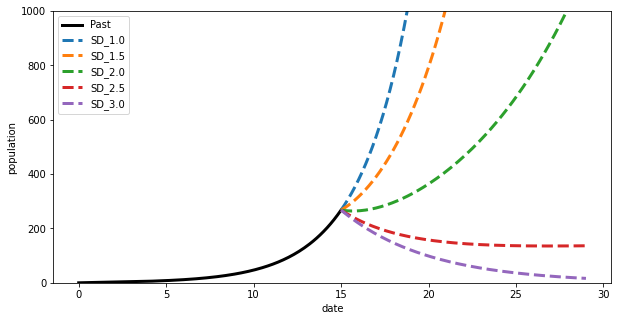

In [ ]:
plt.figure(figsize=(10,5))
t1=time
y1=SNI_1
lines = plt.plot(t1,y1,'k')
plt.setp(lines,linewidth=3)
t2 = time_2
for i in np.linspace(1,3,5):
  temp=result['SD_'+str(i)]
  lines = plt.plot(t2,temp,'--')
  plt.setp(lines, linewidth=3)
plt.ylim([0, 1000])
plt.xlabel('date')
plt.ylabel('population')
plt.legend(('Past','SD_1.0','SD_1.5','SD_2.0','SD_2.5','SD_3.0'), fontsize=10,loc='best')
plt.show()

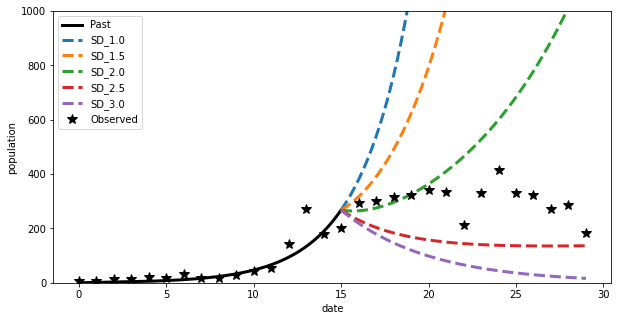

In [ ]:
plt.figure(figsize=(10,5))
t1=time
y1=SNI_1
lines = plt.plot(t1,y1,'k')
plt.setp(lines,linewidth=3)
t2 = time_2
for i in np.linspace(1,3,5):
  temp=result['SD_'+str(i)]
  lines = plt.plot(t2,temp,'--')
  plt.setp(lines, linewidth=3)

t3 = data.index
y3 = data['cases']
lines = plt.plot(t3,y3,'*k')
plt.setp(lines,markersize=10)

plt.ylim([0, 1000])
plt.xlabel('date')
plt.ylabel('population')
plt.legend(('Past','SD_1.0','SD_1.5','SD_2.0','SD_2.5','SD_3.0','Observed'), fontsize=10,loc='best')
plt.show()

In [ ]:
data

,date,cases
0,2020-08-01,6
1,2020-08-02,6
2,2020-08-03,15
3,2020-08-04,14
4,2020-08-05,22
5,2020-08-06,19
6,2020-08-07,34
7,2020-08-08,17
8,2020-08-09,17
9,2020-08-10,29


In [ ]:
# C 봉쇄비용이라 가정
def cost_SD(C,SD):
  return (C*(SD-1)**2)/4 # 거리두기 비용 = C/4*(SD-1)^2

In [ ]:
def TC(model,N0,t0,tf,n,C):
  def Total_cost(x):
    Nt = rk4(model,N0,t0,tf,n,x)
    SNI=alpha*Nt[:,1]
    SN_t=SNI[0:n+1:int(n/(tf-t0))]
    cost=0.44*SN_t.sum()+(tf-t0+1)*cost_SD(C,x) # 사회적 비용 = SD시행 일수 * 1일당 거리두기 비용
    return cost                                 # 감염비용 = 0.44(억) * 신규 감염자
  return Total_cost

In [ ]:
C=[100,250,500,1000,2000] # 5가지 가정한 비용
optimal_SD=np.zeros(5) # 5가지 비용에 따른 최적의 SD 저장 공간 확보
result_optimal=pd.DataFrame() # 5가지 비용에 따른 최적의 SD일 때, 신규 감염자

In [ ]:
bound_optimal=(1,3) # SD는 1-3단계 범위
param_int_optimal=2 # 최적화를 위한 SD 초기값
for i in range(5): # 가정한 C 5가지 경우
  temp_optimal=minimize(TC(SD_f,initial_value2,t02,tf2,n2,C[i]), # 목적함수와 가정한 5가지 C
                        param_int_optimal,method='SLSQP',
                        bounds=(bound_optimal,))
  optimal_SD[i]=temp_optimal.x # 최적의 SD 결과 저장
  temp=rk4(SD_f, initial_value2,t02,tf2,n2,temp_optimal.x) # 최적의 SD에 따른 신규 감염자
  result_optimal['Maxcost_'+str(C[i])]=alpha*temp[:,1] # 최적의 SD에 따른 신규 감염자 저장

In [ ]:
# C 비용에 따른 최적의 결과를 확인
optimal_SD

array([2.66077982, 2.43483498, 2.25222831, 2.07006505, 1.89196715])

              100억         250억       500억        1000억        2000억

              사회적 SD 비용이 비쌀 수록 감염자를 줄이기 위한 강한 거리두기를 하기 주저하게 된다.

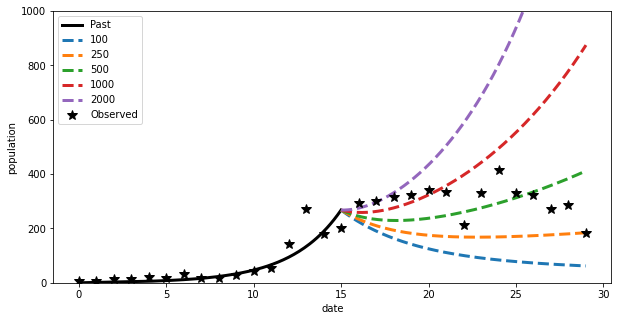

In [ ]:
# C 비용에 따른 최적의 SD를 적용했을 때, 신규 감염자 양상 확인
plt.figure(figsize=(10,5))
t1=time
y1=SNI_1
lines = plt.plot(t1,y1,'k')
plt.setp(lines,linewidth=3)
t2 = time_2
for i in range(5):
  temp=result_optimal['Maxcost_'+str(C[i])]
  lines = plt.plot(t2,temp,'--')
  plt.setp(lines, linewidth=3)

t3 = data.index
y3 = data['cases']
lines = plt.plot(t3,y3,'*k')
plt.setp(lines,markersize=10)

plt.ylim([0, 1000])
plt.xlabel('date')
plt.ylabel('population')
plt.legend(('Past','100','250','500','1000','2000','Observed'), fontsize=10,loc='best')
plt.show()

In [ ]:
len(result_optimal)

141

In [ ]:
len(time_2)

141

---------------------------------------
## 🌼**6주차**
자전거

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#파일 직접 업로드하기
from google.colab import files
myfile1 = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(myfile1['train.csv']))

In [ ]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
myfile2 = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv(io.BytesIO(myfile2['test.csv']))

In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train['datetime'][0]

'2011-01-01 00:00:00'

In [ ]:
train['datetime'][0].split()[0].split('-')[2]

'01'

In [ ]:
train['datetime'][0].split()[1].split(':')[2]

'00'

In [ ]:
train['datetime'].split()[1].split(':')[2]

AttributeError: ignored

In [ ]:
train['datetime'].apply(lambda x: x.split()[1].split(':')[0])

0        00
1        01
2        02
3        03
4        04
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: object

In [ ]:
from datetime import datetime
import calendar

In [ ]:
datetime.strptime(train['datetime'][0].split()[0], '%Y-%m-%d').weekday()

5

In [ ]:
calendar.day_name[datetime.strptime(train['datetime'][0].split()[0], '%Y-%m-%d').weekday()]

'Saturday'

In [ ]:
train['year']=train['datetime'].apply(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d').year)
train['month']=train['datetime'].apply(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d').month)
train['day']=train['datetime'].apply(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d').day)
train['hour']=train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute']=train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second']=train['datetime'].apply(lambda x: x.split()[1].split(':')[2])
train['weekday']=train['datetime'].apply(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d').weekday())

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,00,00,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,01,00,00,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,02,00,00,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,03,00,00,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,04,00,00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,00,00,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,00,00,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,00,00,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,00,00,2


In [ ]:
train['season']=train['season'].map({1:'Spring',
                                     2: 'Summer',
                                     3: 'Fall',
                                     4: 'Winter'})

In [ ]:
train['weather']=train['weather'].map({1:'Clear',
                                       2: 'Mist, few clouds',
                                       3: 'Light snow',
                                       4: 'Heavy snow'})

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011,1,1,00,00,00,5
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011,1,1,01,00,00,5
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011,1,1,02,00,00,5
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011,1,1,03,00,00,5
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011,1,1,04,00,00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,00,00,2
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,00,00,2
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,00,00,2
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,00,00,2


In [ ]:
import seaborn as sns
import matplotlib as mpl

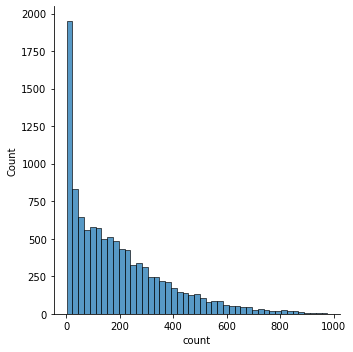

In [ ]:
sns.displot(train['count'])

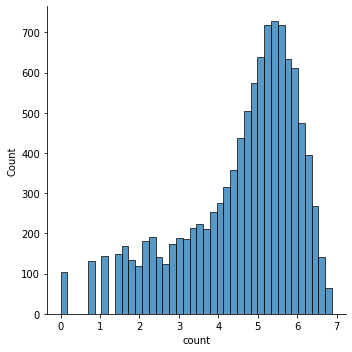

In [ ]:
sns.displot(np.log(train['count']))

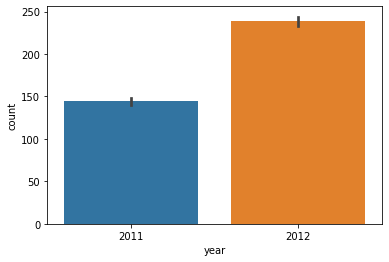

In [ ]:
sns.barplot(x='year',y='count', data=train)

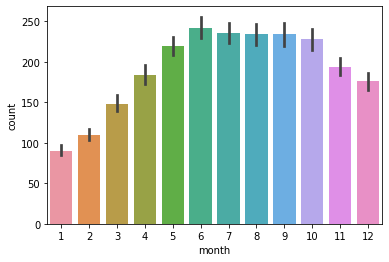

In [ ]:
sns.barplot(x='month',y='count', data=train)

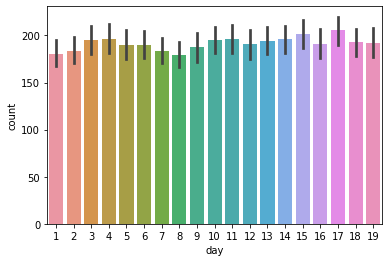

In [ ]:
sns.barplot(x='day',y='count', data=train)

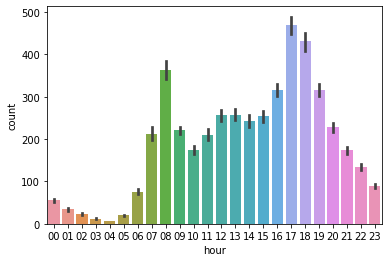

In [ ]:
sns.barplot(x='hour',y='count', data=train)

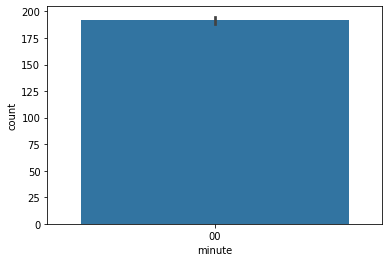

In [ ]:
sns.barplot(x='minute',y='count', data=train)

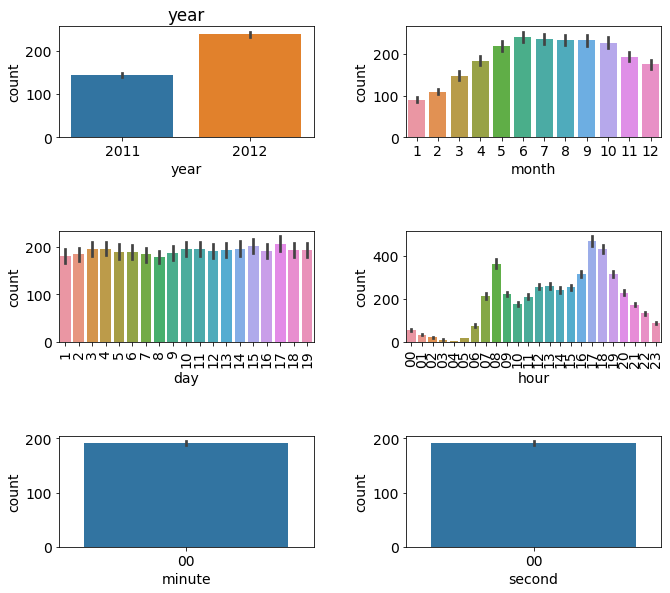

In [ ]:
mpl.rc('font',size=14)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year',y='count', data=train, ax=axes[0,0])
sns.barplot(x='month',y='count', data=train, ax=axes[0,1])
sns.barplot(x='day',y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour',y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute',y='count', data=train, ax=axes[2,0])
sns.barplot(x='second',y='count', data=train, ax=axes[2,1])

axes[0,0].set(title='year')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

---------------------------------------
## 🌼**7주차**
선형회귀법

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import matplotlib as mpl
from datetime import datetime

In [ ]:
#파일 직접 업로드하기
from google.colab import files
myfile1 = files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(myfile1['train_data.csv']))

In [ ]:
myfile2 = files.upload()
test = pd.read_csv(io.BytesIO(myfile2['test_data.csv']))

Saving test_data.csv to test_data.csv


In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-06-03 10:00:00,2,0,0,1,25.42,31.060,43,15.0013,127,277,404
1,2012-08-11 10:00:00,3,0,0,1,29.52,34.090,62,6.0032,125,282,407
2,2011-01-05 23:00:00,1,0,1,1,8.20,12.880,47,0.0000,1,18,19
3,2011-04-06 07:00:00,2,0,1,1,10.66,13.635,65,7.0015,3,130,133
4,2012-10-16 05:00:00,4,0,1,1,17.22,21.210,67,16.9979,5,47,52
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-12-01 02:00:00,4,0,0,2,10.66,15.150,81,0.0000,3,47,50
8704,2012-10-18 06:00:00,4,0,1,1,18.04,21.970,88,19.9995,3,150,153
8705,2012-07-14 20:00:00,3,0,0,1,29.52,35.605,84,6.0032,101,255,356
8706,2012-04-14 13:00:00,2,0,0,1,25.42,31.060,33,19.9995,308,370,678


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-11-18 19:00:00,4,0,0,1,14.76,17.425,66,11.0014,16,194,210
1,2011-01-13 11:00:00,1,0,1,2,8.20,8.335,44,30.0026,4,33,37
2,2012-08-19 02:00:00,3,0,0,2,25.42,30.305,69,6.0032,16,103,119
3,2011-09-13 05:00:00,3,0,1,1,22.96,26.515,88,0.0000,1,19,20
4,2012-06-18 03:00:00,2,0,1,2,21.32,25.000,83,15.0013,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2012-06-14 14:00:00,2,0,1,1,28.70,32.575,54,19.0012,84,214,298
2174,2012-12-01 22:00:00,4,0,0,2,12.30,16.665,87,0.0000,17,130,147
2175,2012-11-19 19:00:00,4,0,1,2,16.40,20.455,58,19.0012,25,381,406
2176,2012-12-14 01:00:00,4,0,1,1,9.02,12.880,69,6.0032,0,26,26


In [ ]:
all_data = pd.concat([train, test],ignore_index=True)

In [ ]:
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-06-03 10:00:00,2,0,0,1,25.42,31.060,43,15.0013,127,277,404
1,2012-08-11 10:00:00,3,0,0,1,29.52,34.090,62,6.0032,125,282,407
2,2011-01-05 23:00:00,1,0,1,1,8.20,12.880,47,0.0000,1,18,19
3,2011-04-06 07:00:00,2,0,1,1,10.66,13.635,65,7.0015,3,130,133
4,2012-10-16 05:00:00,4,0,1,1,17.22,21.210,67,16.9979,5,47,52
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-06-14 14:00:00,2,0,1,1,28.70,32.575,54,19.0012,84,214,298
10882,2012-12-01 22:00:00,4,0,0,2,12.30,16.665,87,0.0000,17,130,147
10883,2012-11-19 19:00:00,4,0,1,2,16.40,20.455,58,19.0012,25,381,406
10884,2012-12-14 01:00:00,4,0,1,1,9.02,12.880,69,6.0032,0,26,26


In [ ]:
datetime.strptime(all_data['datetime'][0], '%Y-%m-%d %H:%M:%S').year

2012

In [ ]:
all_data['year'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)

In [ ]:
all_data['month'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
all_data['hour'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

In [ ]:
all_data['weekday'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())

In [ ]:
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2012-06-03 10:00:00,2,0,0,1,25.42,31.060,43,15.0013,127,277,404,2012,6,10,6
1,2012-08-11 10:00:00,3,0,0,1,29.52,34.090,62,6.0032,125,282,407,2012,8,10,5
2,2011-01-05 23:00:00,1,0,1,1,8.20,12.880,47,0.0000,1,18,19,2011,1,23,2
3,2011-04-06 07:00:00,2,0,1,1,10.66,13.635,65,7.0015,3,130,133,2011,4,7,2
4,2012-10-16 05:00:00,4,0,1,1,17.22,21.210,67,16.9979,5,47,52,2012,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-06-14 14:00:00,2,0,1,1,28.70,32.575,54,19.0012,84,214,298,2012,6,14,3
10882,2012-12-01 22:00:00,4,0,0,2,12.30,16.665,87,0.0000,17,130,147,2012,12,22,5
10883,2012-11-19 19:00:00,4,0,1,2,16.40,20.455,58,19.0012,25,381,406,2012,11,19,0
10884,2012-12-14 01:00:00,4,0,1,1,9.02,12.880,69,6.0032,0,26,26,2012,12,1,4


In [ ]:
all_data[all_data['weather']!=4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2012-06-03 10:00:00,2,0,0,1,25.42,31.060,43,15.0013,127,277,404,2012,6,10,6
1,2012-08-11 10:00:00,3,0,0,1,29.52,34.090,62,6.0032,125,282,407,2012,8,10,5
2,2011-01-05 23:00:00,1,0,1,1,8.20,12.880,47,0.0000,1,18,19,2011,1,23,2
3,2011-04-06 07:00:00,2,0,1,1,10.66,13.635,65,7.0015,3,130,133,2011,4,7,2
4,2012-10-16 05:00:00,4,0,1,1,17.22,21.210,67,16.9979,5,47,52,2012,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-06-14 14:00:00,2,0,1,1,28.70,32.575,54,19.0012,84,214,298,2012,6,14,3
10882,2012-12-01 22:00:00,4,0,0,2,12.30,16.665,87,0.0000,17,130,147,2012,12,22,5
10883,2012-11-19 19:00:00,4,0,1,2,16.40,20.455,58,19.0012,25,381,406,2012,11,19,0
10884,2012-12-14 01:00:00,4,0,1,1,9.02,12.880,69,6.0032,0,26,26,2012,12,1,4


In [ ]:
all_data = all_data[all_data['weather']!=4]

In [ ]:
all_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [ ]:
drop_features = ['casual', 'registered','datetime','windspeed']

In [ ]:
all_data = all_data.drop(drop_features, axis=1)

In [ ]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,month,hour,weekday
0,2,0,0,1,25.42,31.060,43,404,2012,6,10,6
1,3,0,0,1,29.52,34.090,62,407,2012,8,10,5
2,1,0,1,1,8.20,12.880,47,19,2011,1,23,2
3,2,0,1,1,10.66,13.635,65,133,2011,4,7,2
4,4,0,1,1,17.22,21.210,67,52,2012,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2,0,1,1,28.70,32.575,54,298,2012,6,14,3
10882,4,0,0,2,12.30,16.665,87,147,2012,12,22,5
10883,4,0,1,2,16.40,20.455,58,406,2012,11,19,0
10884,4,0,1,1,9.02,12.880,69,26,2012,12,1,4


In [ ]:
del all_data['month']

In [ ]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,2,0,0,1,25.42,31.060,43,404,2012,10,6
1,3,0,0,1,29.52,34.090,62,407,2012,10,5
2,1,0,1,1,8.20,12.880,47,19,2011,23,2
3,2,0,1,1,10.66,13.635,65,133,2011,7,2
4,4,0,1,1,17.22,21.210,67,52,2012,5,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2,0,1,1,28.70,32.575,54,298,2012,14,3
10882,4,0,0,2,12.30,16.665,87,147,2012,22,5
10883,4,0,1,2,16.40,20.455,58,406,2012,19,0
10884,4,0,1,1,9.02,12.880,69,26,2012,1,4


In [ ]:
X_train = all_data[0:8707]

In [ ]:
X_test = all_data[8707:]

In [ ]:
y_train = X_train[['count']]
y_test = X_test[['count']]

In [ ]:
del X_train['count']
del X_test['count']

In [ ]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,2,0,0,1,25.42,31.060,43,2012,10,6
1,3,0,0,1,29.52,34.090,62,2012,10,5
2,1,0,1,1,8.20,12.880,47,2011,23,2
3,2,0,1,1,10.66,13.635,65,2011,7,2
4,4,0,1,1,17.22,21.210,67,2012,5,1
...,...,...,...,...,...,...,...,...,...,...
8703,4,0,0,2,10.66,15.150,81,2012,2,5
8704,4,0,1,1,18.04,21.970,88,2012,6,3
8705,3,0,0,1,29.52,35.605,84,2012,20,5
8706,2,0,0,1,25.42,31.060,33,2012,13,5


In [ ]:
y_train

,count
0,404
1,407
2,19
3,133
4,52
...,...
8703,50
8704,153
8705,356
8706,678


In [ ]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
8708,4,0,0,1,14.76,17.425,66,2012,19,6
8709,1,0,1,2,8.20,8.335,44,2011,11,3
8710,3,0,0,2,25.42,30.305,69,2012,2,6
8711,3,0,1,1,22.96,26.515,88,2011,5,1
8712,2,0,1,2,21.32,25.000,83,2012,3,0
...,...,...,...,...,...,...,...,...,...,...
10881,2,0,1,1,28.70,32.575,54,2012,14,3
10882,4,0,0,2,12.30,16.665,87,2012,22,5
10883,4,0,1,2,16.40,20.455,58,2012,19,0
10884,4,0,1,1,9.02,12.880,69,2012,1,4


In [ ]:
y_test

,count
8708,210
8709,37
8710,119
8711,20
8712,4
...,...
10881,298
10882,147
10883,406
10884,26


In [ ]:
def RMSLE(y_true, y_pred, convertExp):
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)

  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred = np.nan_to_num(np.log(y_pred+1))

  output = np.sqrt(np.mean((log_true-log_pred)**2))
  return output

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Lin_model = LinearRegression()

In [ ]:
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

In [ ]:
Lin_model.fit(X_train,log_y_train)

LinearRegression()

In [ ]:
Lin_model.coef_

array([[ 0.18075577,  0.02317785, -0.00587388, -0.00668758,  0.0131375 ,
         0.03163726, -0.0151898 ,  0.43768858,  0.10435207,  0.0265815 ]])

In [ ]:
Lin_model.intercept_

array([-877.66154803])

In [ ]:
Lin_model.predict(X_train)

array([[5.18915978],
       [5.20445256],
       [4.95294017],
       ...,
       [5.96172823],
       [5.62753246],
       [3.55174114]])

In [ ]:
Lin_model.predict(X_test)

array([[5.56905488],
       [3.62238726],
       [4.10959054],
       ...,
       [5.63592916],
       [3.36691067],
       [6.33647966]])

In [ ]:
RMSLE(log_y_train,Lin_model.predict(X_train),True)

1.021474041377979

In [ ]:
RMSLE(log_y_test,Lin_model.predict(X_test),True)

1.0178845331327975

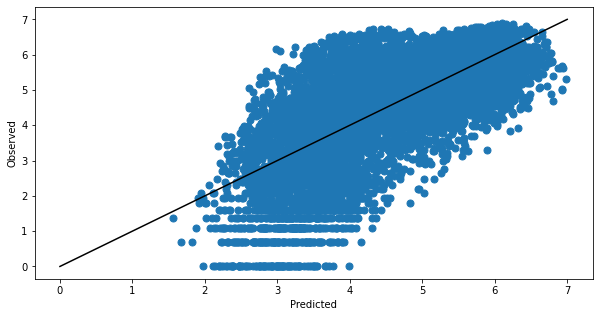

In [ ]:
plt.figure(figsize=(10,5))
x = np.linspace(0,7)
y=x
lines = plt.plot(Lin_model.predict(X_train),log_y_train,'o',x,y,'k')
plt.setp(lines[0], markersize=7)
plt.setp(lines[0], linewidth=3)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()